In [80]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import wooldridge
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_excel('/content/drive/MyDrive/GPA UNI/NĂM 3 HKI/Analysis of Panel data/PROJECT/Bank data.xlsx')
df

,mack,nam,size,llp,nim,roe,car,lta,eta,lvr,gdp,inf,fg,ld,la
0,ABB,2011,7.6185,0.0162,0.0551,0.1058,0.1400,0.4718,0.1137,0.8863,0.064,0.1868,-0.1418,0.7689,0.2223
1,ABB,2012,7.6629,0.0225,0.0478,0.0638,0.1200,0.3986,0.1065,0.8935,0.055,0.0909,-0.3263,0.5499,0.2875
2,ABB,2013,7.7606,0.0284,0.0286,0.0750,0.1780,0.3990,0.0997,0.9003,0.056,0.0659,-0.3057,0.5662,0.3114
3,ABB,2014,7.8291,0.0186,0.0267,0.0245,0.1430,0.3779,0.0847,0.9153,0.064,0.0408,-0.2906,0.5653,0.3070
4,ABB,2015,7.8087,0.0126,0.0279,0.0203,0.1747,0.4743,0.0899,0.9101,0.070,0.0063,-0.2641,0.6423,0.2163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,VIB,2017,8.0905,0.0120,0.0326,0.0641,0.1307,0.6408,0.0714,0.9286,0.069,0.0352,0.0122,1.0193,0.1208
315,VIB,2018,8.1435,0.0092,0.0390,0.1156,0.1290,0.6845,0.0767,0.9233,0.072,0.0354,0.0018,1.0026,0.0861
316,VIB,2019,8.2661,0.0101,0.0425,0.1821,0.0967,0.6932,0.0728,0.9272,0.072,0.0280,-0.0629,0.9169,0.1312
317,VIB,2020,8.3886,0.0104,0.0455,0.2080,0.1012,0.6857,0.0735,0.9265,0.029,0.0322,-0.0455,0.9378,0.1242


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mack    319 non-null    object 
 1   nam     319 non-null    int64  
 2   size    319 non-null    float64
 3   llp     319 non-null    float64
 4   nim     319 non-null    float64
 5   roe     319 non-null    float64
 6   car     319 non-null    float64
 7   lta     319 non-null    float64
 8   eta     319 non-null    float64
 9   lvr     319 non-null    float64
 10  gdp     319 non-null    float64
 11  inf     319 non-null    float64
 12  fg      319 non-null    float64
 13  ld      319 non-null    float64
 14  la      319 non-null    float64
dtypes: float64(13), int64(1), object(1)
memory usage: 37.5+ KB


In [7]:
multi_index_df = df.set_index(['mack', 'nam'])
multi_index_df

size     llp     nim     roe     car     lta     eta     lvr  \
mack nam                                                                    
ABB  2011  7.6185  0.0162  0.0551  0.1058  0.1400  0.4718  0.1137  0.8863   
     2012  7.6629  0.0225  0.0478  0.0638  0.1200  0.3986  0.1065  0.8935   
     2013  7.7606  0.0284  0.0286  0.0750  0.1780  0.3990  0.0997  0.9003   
     2014  7.8291  0.0186  0.0267  0.0245  0.1430  0.3779  0.0847  0.9153   
     2015  7.8087  0.0126  0.0279  0.0203  0.1747  0.4743  0.0899  0.9101   
...           ...     ...     ...     ...     ...     ...     ...     ...   
VIB  2017  8.0905  0.0120  0.0326  0.0641  0.1307  0.6408  0.0714  0.9286   
     2018  8.1435  0.0092  0.0390  0.1156  0.1290  0.6845  0.0767  0.9233   
     2019  8.2661  0.0101  0.0425  0.1821  0.0967  0.6932  0.0728  0.9272   
     2020  8.3886  0.0104  0.0455  0.2080  0.1012  0.6857  0.0735  0.9265   
     2021  8.4907  0.0121  0.0487  0.2197  0.1172  0.6433  0.0785  0.9215   

             gdp     inf      fg      ld      la  
mack nam                                          
ABB  2011  0.064  0.1868 -0.1418  0.7689  0.2223  
     2012  0.055  0.0909 -0.3263  0.5499  0.2875  
     2013  0.056  0.0659 -0.3057  0.5662  0.3114  
     2014  0.064  0.0408 -0.2906  0.5653  0.3070  
     2015  0.070  0.0063 -0.2641  0.6423  0.2163  
...          ...     ...     ...     ...     ...  
VIB  2017  0.069  0.0352  0.0122  1.0193  0.1208  
     2018  0.072  0.0354  0.0018  1.0026  0.0861  
     2019  0.072  0.0280 -0.0629  0.9169  0.1312  
     2020  0.029  0.0322 -0.0455  0.9378  0.1242  
     2021  0.026  0.0183 -0.0541  0.9224  0.1757  

[319 rows x 13 columns]

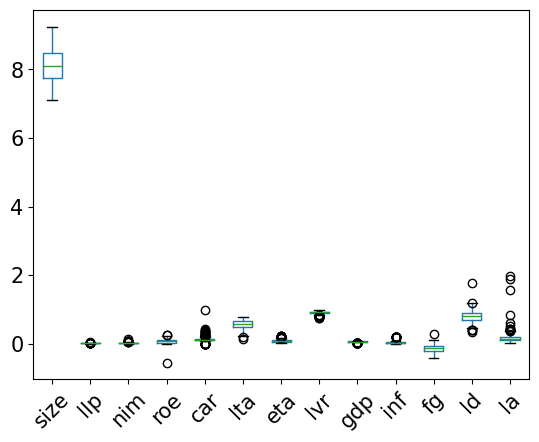

In [9]:
boxplot = multi_index_df.boxplot(grid=False, rot=45, fontsize=15)  

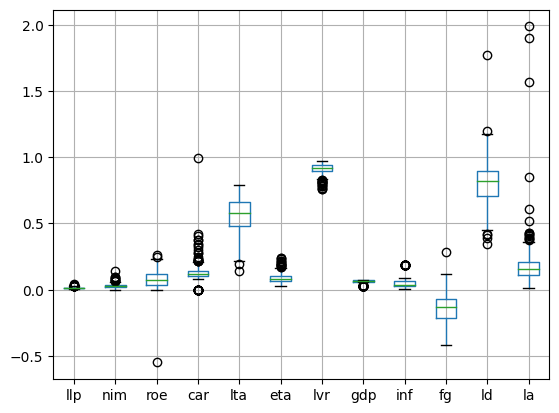

In [10]:
boxplot = df.boxplot(column=['llp', 'nim', 'roe','car',	'lta',	'eta',	'lvr',	'gdp',	'inf',	'fg'	,'ld',	'la'])  

In [11]:
multi_index_df.describe()

,size,llp,nim,roe,car,lta,eta,lvr,gdp,inf,fg,ld,la
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,8.111280,0.013703,0.031896,0.079888,0.128687,0.563933,0.089020,0.910963,0.058545,0.051500,-0.140338,0.803187,0.186070
std,0.519823,0.005263,0.014831,0.066516,0.077425,0.123097,0.038554,0.038557,0.015647,0.048119,0.103756,0.156592,0.187204
min,7.121400,0.005500,0.000000,-0.549600,0.000000,0.144800,0.027000,0.761700,0.026000,0.006300,-0.420700,0.343400,0.016400
25%,7.741600,0.010200,0.021900,0.034900,0.100850,0.478200,0.062300,0.896200,0.055000,0.026700,-0.213900,0.708250,0.109650
50%,8.096400,0.012100,0.030100,0.074300,0.118100,0.579600,0.078300,0.921700,0.064000,0.035200,-0.132400,0.819700,0.155200
75%,8.492100,0.015800,0.037700,0.117900,0.144750,0.661700,0.103800,0.937700,0.070000,0.065900,-0.070350,0.899100,0.211150
max,9.245900,0.041400,0.138600,0.261000,0.995000,0.788100,0.238300,0.973100,0.072000,0.186800,0.282600,1.770300,1.987100


In [36]:
y = multi_index_df ['la']
X = multi_index_df [['size', 'llp', 'nim','roe','car','lta','eta','gdp','inf','lvr','fg','ld']]

In [13]:
correlation_matrix = multi_index_df.corr()
print(correlation_matrix)

          size       llp       nim       roe       car       lta       eta  \
size  1.000000  0.286546  0.079004  0.423512 -0.285385  0.351355 -0.621488   
llp   0.286546  1.000000  0.135483  0.128020 -0.080806 -0.051750 -0.087221   
nim   0.079004  0.135483  1.000000  0.396346  0.067340  0.209207  0.288105   
roe   0.423512  0.128020  0.396346  1.000000 -0.193969  0.188554 -0.129429   
car  -0.285385 -0.080806  0.067340 -0.193969  1.000000 -0.063840  0.452615   
lta   0.351355 -0.051750  0.209207  0.188554 -0.063840  1.000000 -0.097015   
eta  -0.621488 -0.087221  0.288105 -0.129429  0.452615 -0.097015  1.000000   
lvr   0.621041  0.087927 -0.288281  0.129480 -0.452580  0.097035 -0.999956   
gdp  -0.151649 -0.114162 -0.057329 -0.166973  0.075508 -0.001024 -0.018110   
inf  -0.253398  0.176991  0.174337  0.115472  0.111674 -0.314100  0.252339   
fg    0.007160 -0.086128  0.266493  0.223500  0.073559  0.517009  0.235593   
ld    0.088004 -0.102684  0.288740  0.217803  0.057284  0.655405

In [14]:
ols_model = sm.OLS(multi_index_df ['la'], sm.add_constant(multi_index_df [['size', 'llp', 'nim','roe','car','lta','eta','gdp','inf']])).fit()
print("Ordinary Least Squares (OLS):")
print(ols_model.summary())

Ordinary Least Squares (OLS):
                            OLS Regression Results                            
Dep. Variable:                     la   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     5.492
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           5.16e-07
Time:                        14:08:56   Log-Likelihood:                 106.03
No. Observations:                 319   AIC:                            -192.1
Df Residuals:                     309   BIC:                            -154.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8295 

In [15]:
fem_model = sm.OLS(df['la'], sm.add_constant(df[['size', 'llp', 'nim','roe','car','lta','eta','gdp','inf']])).fit(cov_type='cluster', cov_kwds={'groups': df['mack']})
print("Fixed Effects Model:")
print(fem_model.summary())

Fixed Effects Model:
                            OLS Regression Results                            
Dep. Variable:                     la   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     4.369
Date:                Sat, 03 Jun 2023   Prob (F-statistic):            0.00124
Time:                        14:08:59   Log-Likelihood:                 106.03
No. Observations:                 319   AIC:                            -192.1
Df Residuals:                     309   BIC:                            -154.4
Df Model:                           9                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8295      0.30

In [17]:
rem_model = sm.MixedLM(df['la'], sm.add_constant(df[['size', 'llp', 'nim','roe','car','lta','eta','gdp','inf']]), groups=df['mack'])
rem_result = rem_model.fit()
print("Random Effects Model:")
print(rem_result.summary())


Random Effects Model:
        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: la      
No. Observations: 319     Method:             REML    
No. Groups:       29      Scale:              0.0226  
Min. group size:  11      Log-Likelihood:     124.9731
Max. group size:  11      Converged:          Yes     
Mean group size:  11.0                                
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
const        0.624    0.373  1.672 0.095 -0.107  1.355
size        -0.040    0.045 -0.899 0.369 -0.127  0.047
llp         -0.132    2.086 -0.063 0.949 -4.221  3.957
nim         -3.009    0.893 -3.368 0.001 -4.759 -1.258
roe          0.670    0.176  3.801 0.000  0.324  1.015
car          0.136    0.131  1.038 0.299 -0.121  0.393
lta         -0.195    0.109 -1.788 0.074 -0.408  0.019
eta          0.653    0.410  1.592 0.111 -0.151  1.4

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [46]:
pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.2 MB/s eta 0:00:00


In [48]:
import pandas as pd
from linearmodels.panel import PanelOLS

In [52]:
fe_model = PanelOLS(multi_index_df['la'], multi_index_df[['size', 'llp', 'nim','roe','car','lta','eta','gdp','inf','lvr','fg','ld']], entity_effects=True).fit()
print(fe_model)

                          PanelOLS Estimation Summary                           
Dep. Variable:                     la   R-squared:                        0.1569
Estimator:                   PanelOLS   R-squared (Between):             -44.550
No. Observations:                 319   R-squared (Within):               0.1569
Date:                Sat, Jun 03 2023   R-squared (Overall):             -29.523
Time:                        15:22:07   Log-likelihood                    173.64
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      4.3114
Entities:                          29   P-value                           0.0000
Avg Obs:                       11.000   Distribution:                  F(12,278)
Min Obs:                       11.000                                           
Max Obs:                       11.000   F-statistic (robust):             4.3114
                            

In [32]:
from statsmodels.regression import linear_model

In [41]:
df_with_constant = sm.add_constant(df)
ols_model = sm.OLS(df['la'], df_with_constant[['const', 'size', 'llp', 'nim','roe','car','lta','eta','gdp','inf','lvr','fg','ld']]).fit()

In [42]:
# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = df_with_constant[['const', 'size', 'llp', 'nim','roe','car','lta','eta','gdp','inf','lvr','fg','ld']].columns
vif["VIF"] = [variance_inflation_factor(df_with_constant[['const', 'size', 'llp', 'nim','roe','car','lta','eta','gdp','inf','lvr','fg','ld']].values, i) for i in range(df_with_constant[['const', 'size', 'llp', 'nim','roe','car','lta','eta','gdp','inf','lvr','fg','ld']].shape[1])]

# Print the VIF results
print(vif)

   Variable           VIF
0     const  7.828361e+06
1      size  2.773596e+00
2       llp  1.269040e+00
3       nim  1.524133e+00
4       roe  1.648706e+00
5       car  1.312848e+00
6       lta  2.746850e+00
7       eta  1.159920e+04
8       gdp  1.107783e+00
9       inf  1.409772e+00
10      lvr  1.158043e+04
11       fg  1.455993e+01
12       ld  1.825579e+01


In [75]:
pip install wooldridge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

In [71]:
model = sm.OLS(df['la'], df_with_constant[['const',  'size', 'llp', 'nim','roe','car','lta','eta','gdp','inf','lvr','fg','ld']]).fit()

In [79]:
wooldridge_test = acorr_breusch_godfrey(model, nlags=1)
# Print the test results
print(wooldridge_test)

(115.39361731966463, 6.452948571762664e-27, 172.85830050698567, 1.381607594826196e-31)


In [84]:
# package to perform ADF test
from statsmodels.tsa.stattools import adfuller

In [85]:
la_values = multi_index_df.la
 
res = adfuller(la_values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -6.891863
p-value: 0.000000
critical values at different levels:
	1%: -3.451
	5%: -2.871
	10%: -2.572


In [88]:
llp_values = multi_index_df.llp
 
res = adfuller(llp_values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -9.102187
p-value: 0.000000
critical values at different levels:
	1%: -3.451
	5%: -2.871
	10%: -2.572


In [89]:
roe_values = multi_index_df.roe
 
res = adfuller(roe_values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -9.761538
p-value: 0.000000
critical values at different levels:
	1%: -3.451
	5%: -2.871
	10%: -2.572


In [90]:
car_values = multi_index_df.car
 
res = adfuller(car_values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -7.447676
p-value: 0.000000
critical values at different levels:
	1%: -3.451
	5%: -2.871
	10%: -2.572


In [91]:
lta_values = multi_index_df.lta
 
res = adfuller(lta_values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -6.554601
p-value: 0.000000
critical values at different levels:
	1%: -3.451
	5%: -2.871
	10%: -2.572


In [92]:
gdp_values = multi_index_df.gdp
 
res = adfuller(gdp_values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -52694955734576.968750
p-value: 0.000000
critical values at different levels:
	1%: -3.452
	5%: -2.871
	10%: -2.572


In [93]:
inf_values = multi_index_df.inf
 
res = adfuller(inf_values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -4790402635236949.000000
p-value: 0.000000
critical values at different levels:
	1%: -3.452
	5%: -2.871
	10%: -2.572


In [ ]:
# Specify FGLS model
model = sm.GLSAR(y, X, rho=2, data=multi_index_df)

# Fit FGLS model
results = model.fit()

# Print summary of FGLS model results
print(results.summary())

                                GLSAR Regression Results                               
Dep. Variable:                     fg   R-squared (uncentered):                   0.782
Model:                          GLSAR   Adj. R-squared (uncentered):              0.777
Method:                 Least Squares   F-statistic:                              138.9
Date:                Fri, 24 Feb 2023   Prob (F-statistic):                    1.43e-97
Time:                        12:44:26   Log-Likelihood:                          346.57
No. Observations:                 317   AIC:                                     -677.1
Df Residuals:                     309   BIC:                                     -647.1
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------